In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotting_helper
import statsmodels.api as sm
from importlib import reload
import numpy as np
import operator
warnings.filterwarnings('ignore')

In [13]:
files = os.listdir('stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

In [14]:
print('List of stocks:', end=' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks: RELIANCE TCS ICICIBANK WIPRO INFY 

In [15]:
stocks['tcs'].head()

,High,Low,Open,Close,Volume,Adj Close,Return,Change,Volatility,MA7,MA21,Momentum,MACD,Signal,Upper_band,Lower_band
Date,,,,,,,,,,,,,,,,
2016-11-30,1147.375000,1121.150024,1132.5,1138.025024,3445832.0,1033.440308,0.005,8.099976,39.248951,1114.189314,1109.416678,1147.175049,-7.488633,-16.831285,1191.755554,1027.077803
2016-12-01,1145.000000,1127.025024,1138.5,1131.724976,1123052.0,1027.719360,-0.006,-6.300049,38.332362,1123.364310,1107.355963,1138.300049,-5.459548,-14.556937,1184.823069,1029.888857
2016-12-02,1135.400024,1102.599976,1129.0,1110.925049,1998032.0,1008.830811,-0.016,-20.799927,36.950587,1128.042882,1105.398821,1126.925049,-5.466845,-12.738919,1180.155410,1030.642233
2016-12-05,1118.925049,1085.000000,1114.5,1093.000000,2249526.0,992.552917,-0.019,-17.925049,35.891984,1127.867885,1102.221441,1135.025024,-6.840180,-11.559171,1172.837483,1031.605400
2016-12-06,1101.974976,1084.949951,1095.0,1091.175049,1593444.0,990.895630,-0.003,-1.824951,34.924366,1119.439314,1098.692871,1128.724976,-7.983785,-10.844094,1163.218724,1034.167019


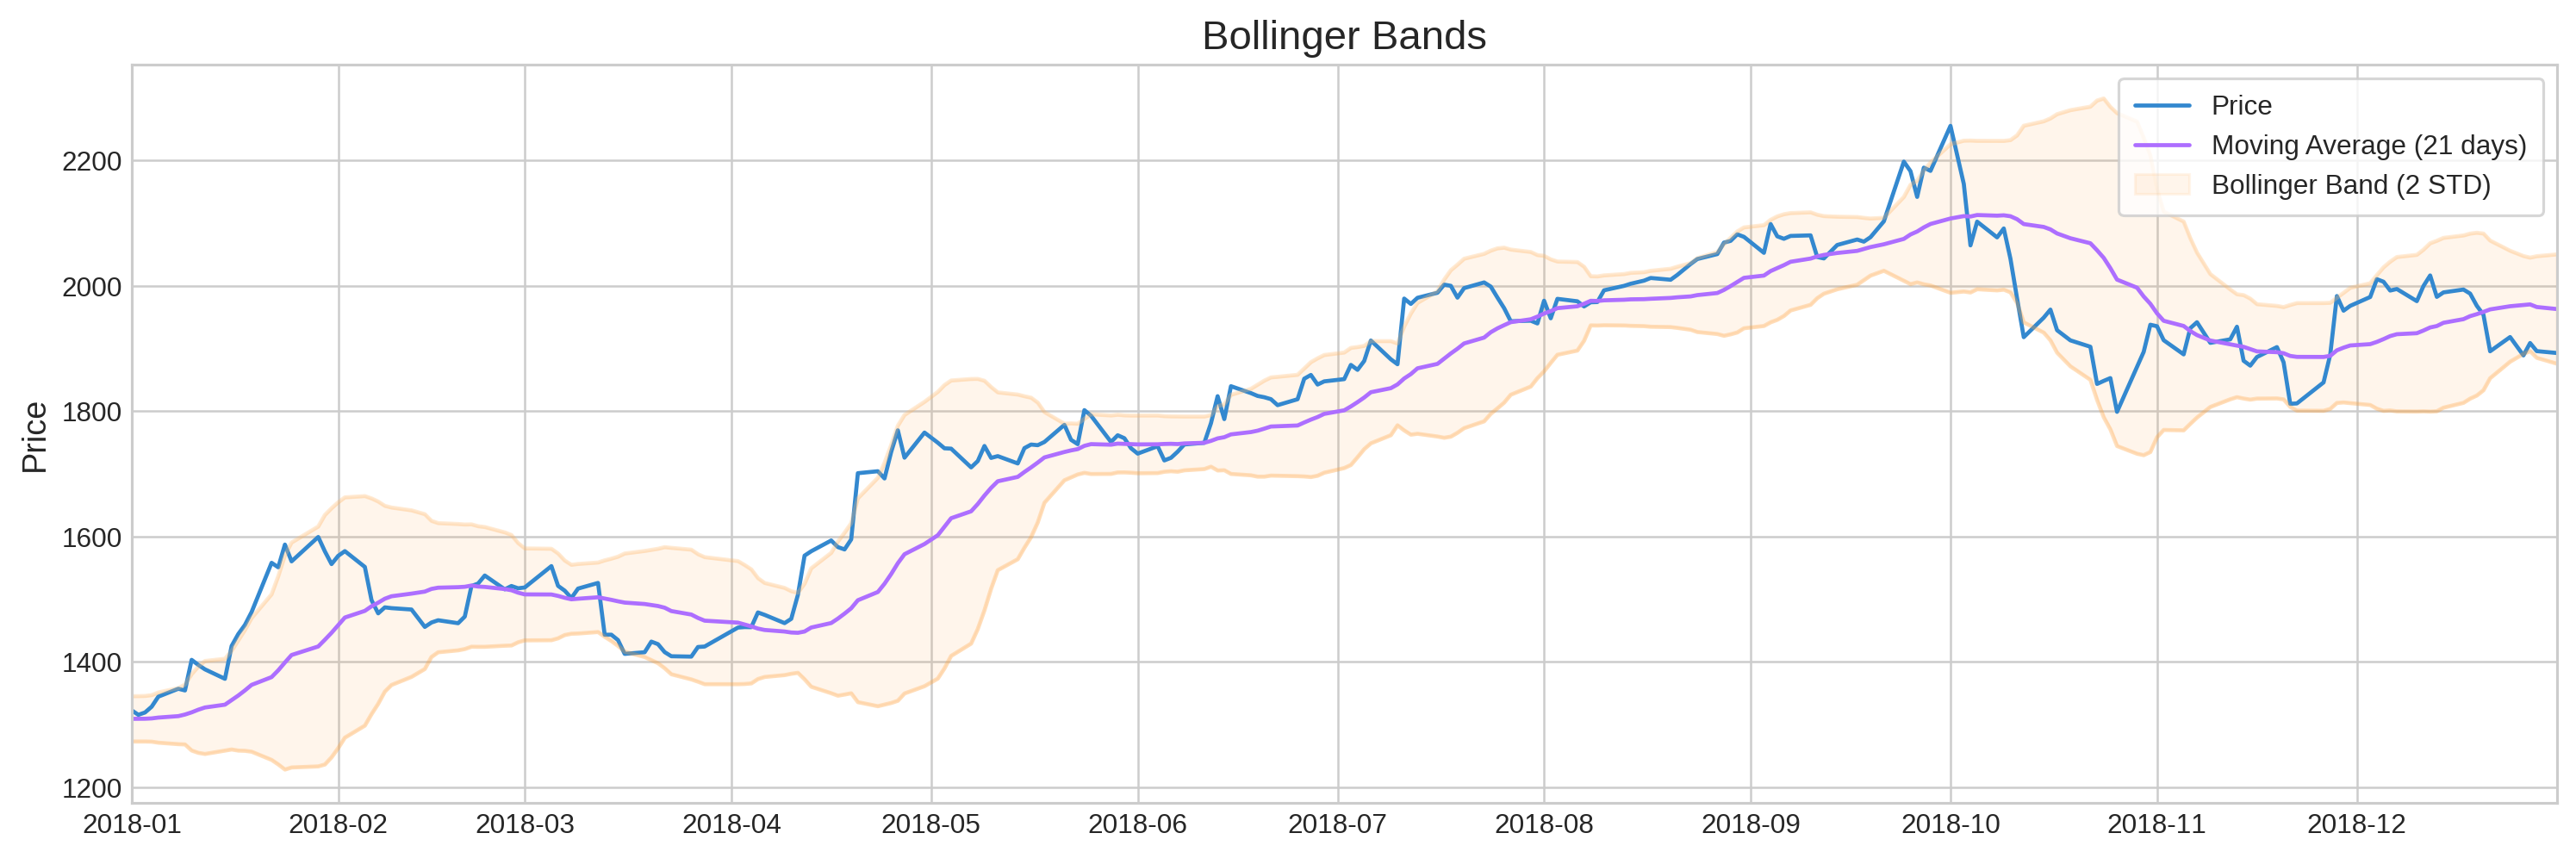

In [17]:
plotting_helper.bollinger_bands(stocks['tcs'].loc['2018':'2018'])

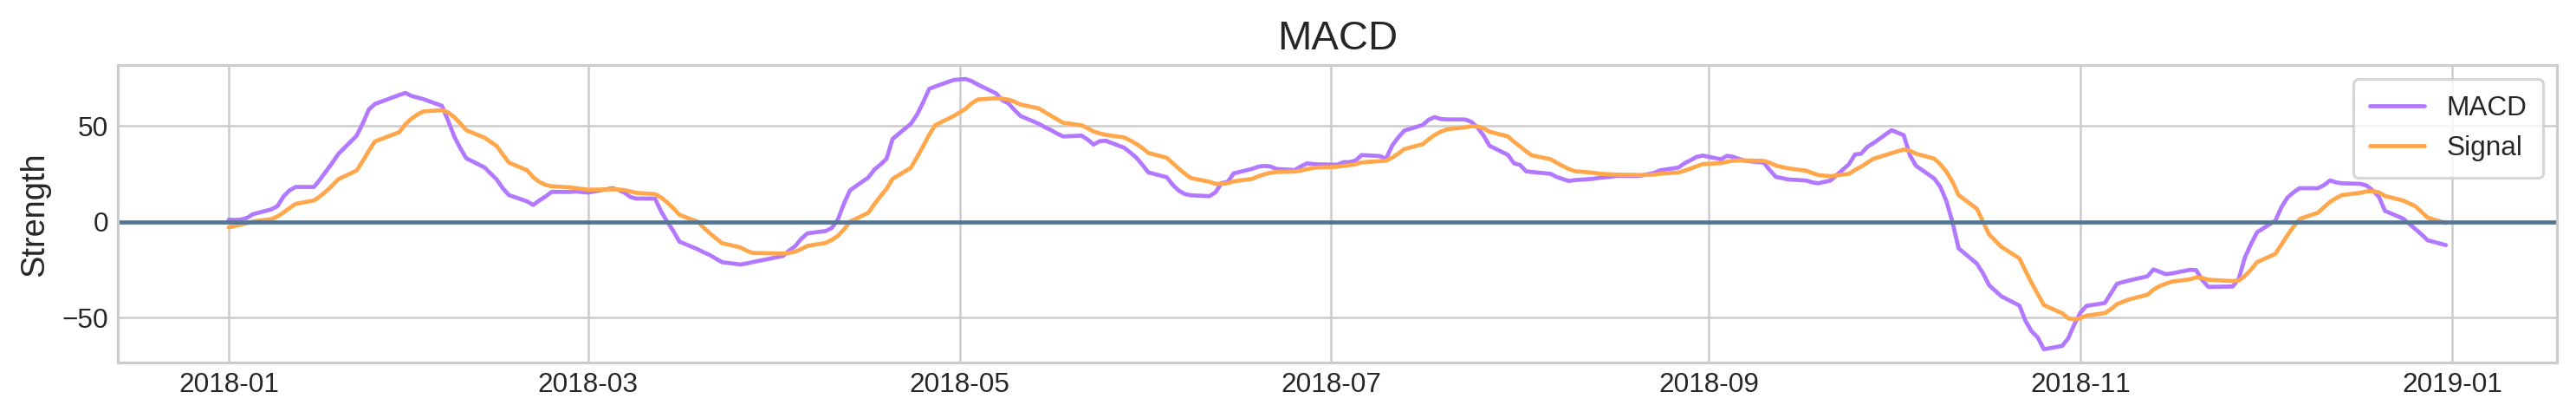

In [19]:
plotting_helper.macd(stocks['tcs'].loc['2018':'2018'])

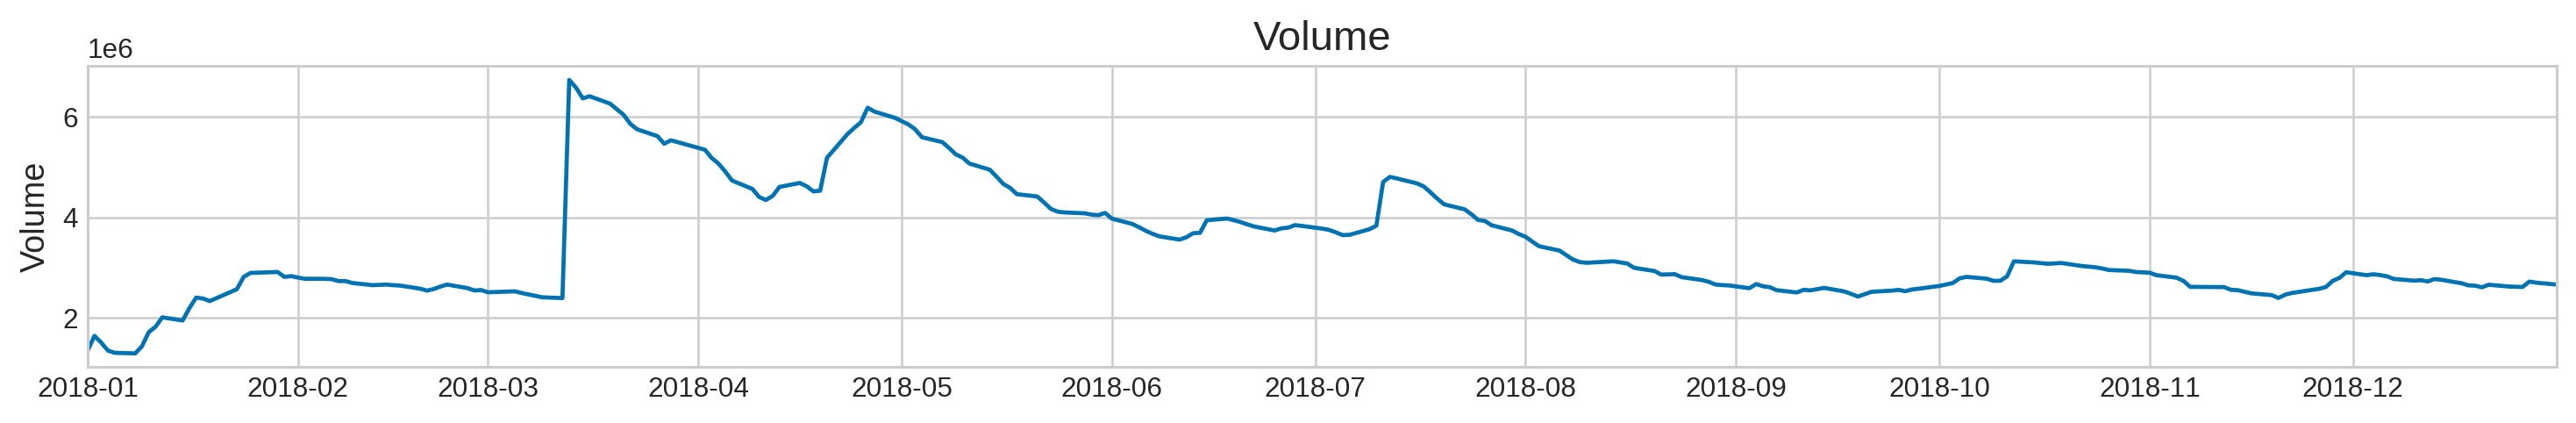

In [21]:
plotting_helper.volume(stocks['tcs'].loc['2018':'2018'])

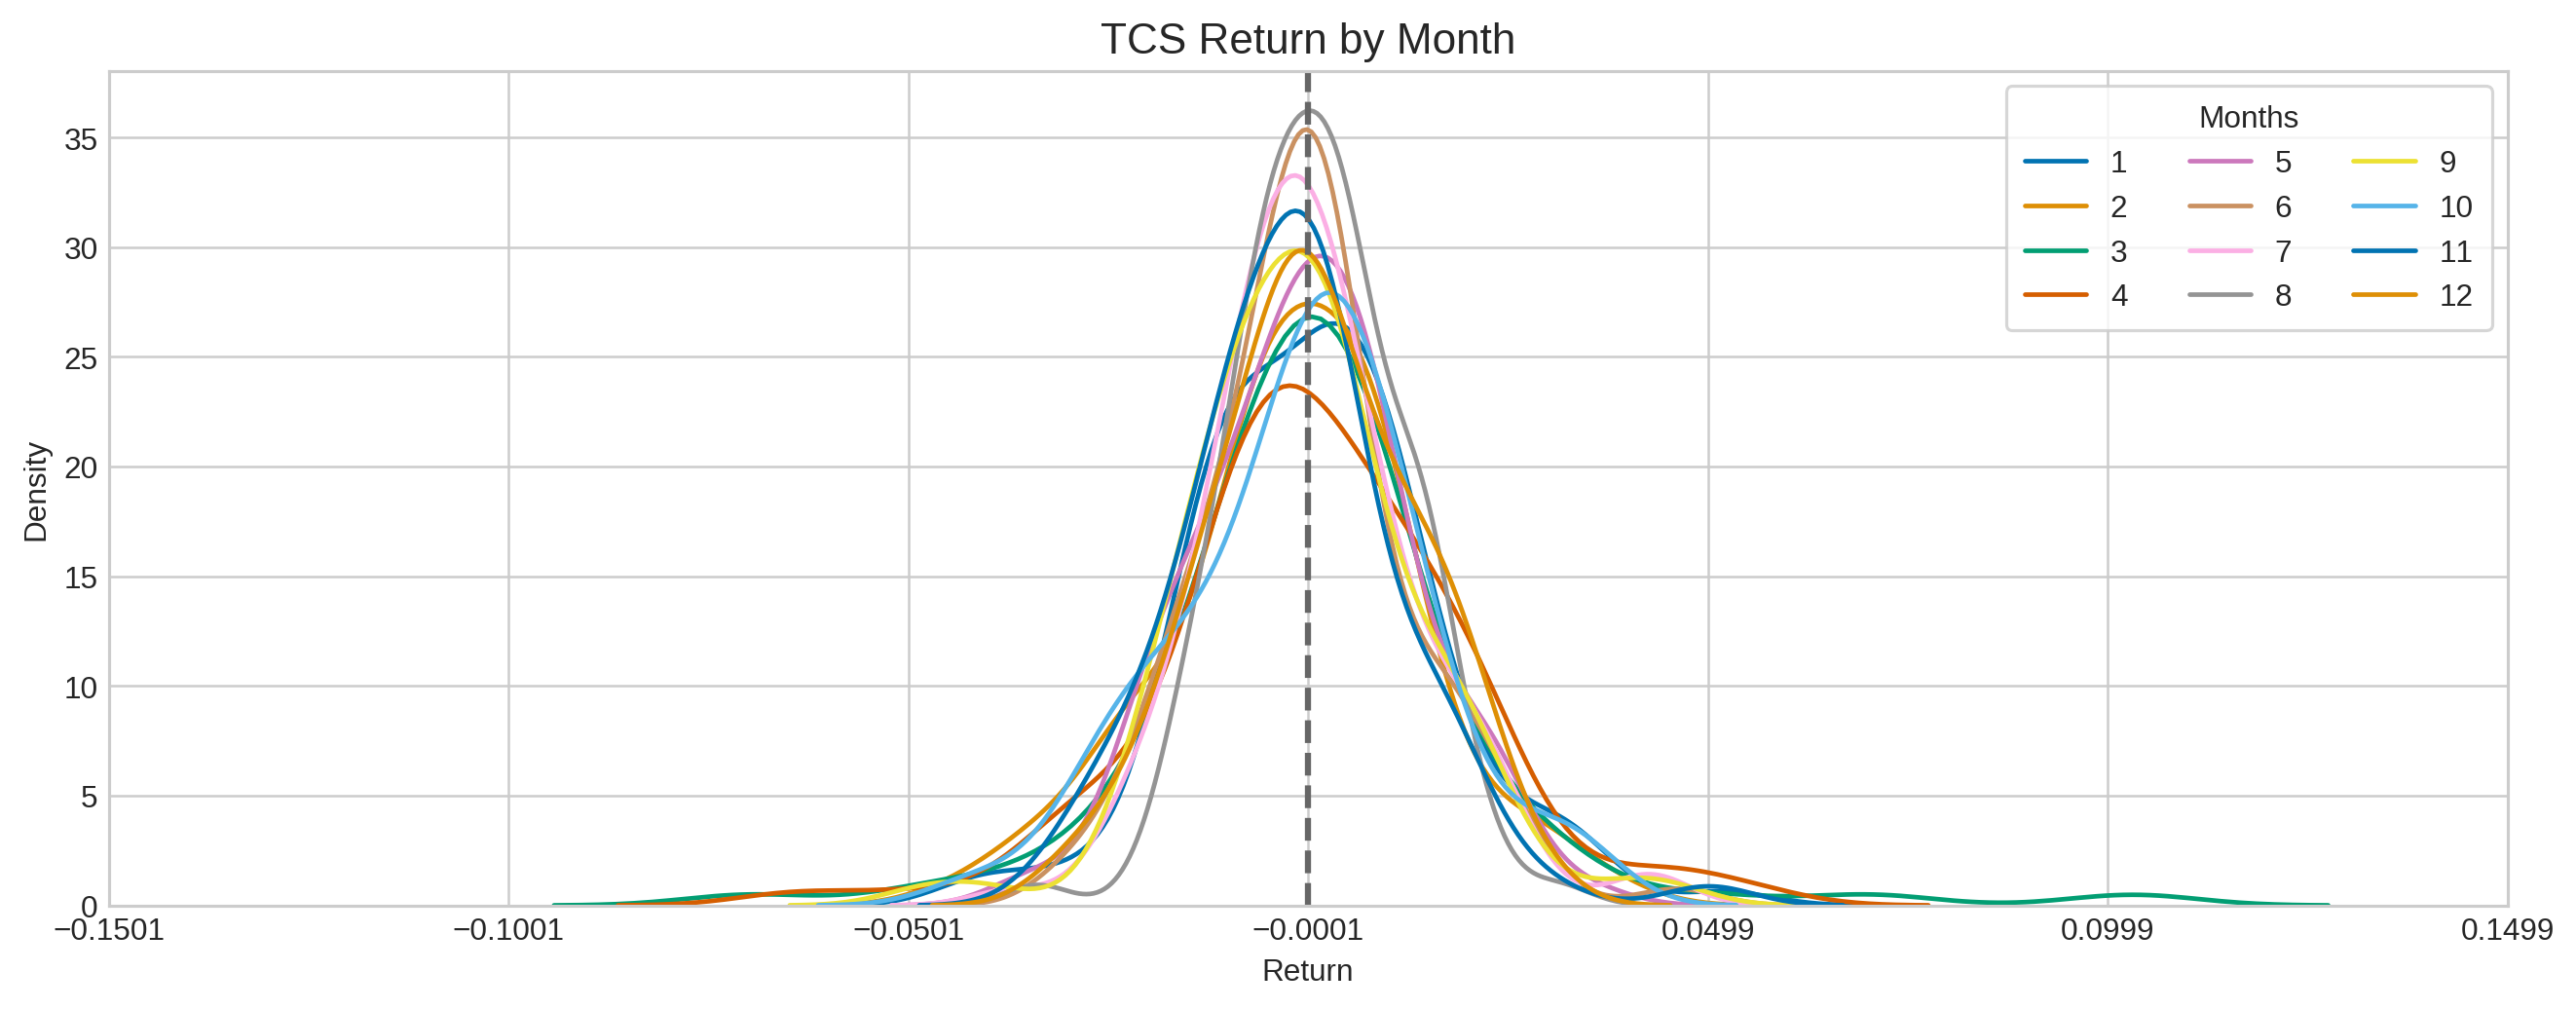

In [22]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
for i in range(1,13):
    volatility = stocks['tcs'][stocks['tcs'].index.month==i].Return
    sns.distplot(volatility, hist=False, label=i)
    plt.legend(frameon=True, loc=1, ncol=3, fontsize=10, borderpad=.6, title='Months')
plt.axvline(stocks['tcs'].Return.mean(), color='#666666', ls='--', lw=2)
plt.xticks(plt.xticks()[0] + stocks['tcs'].Return.mean())
plt.title('TCS Return by Month', fontSize=14)
plt.show()

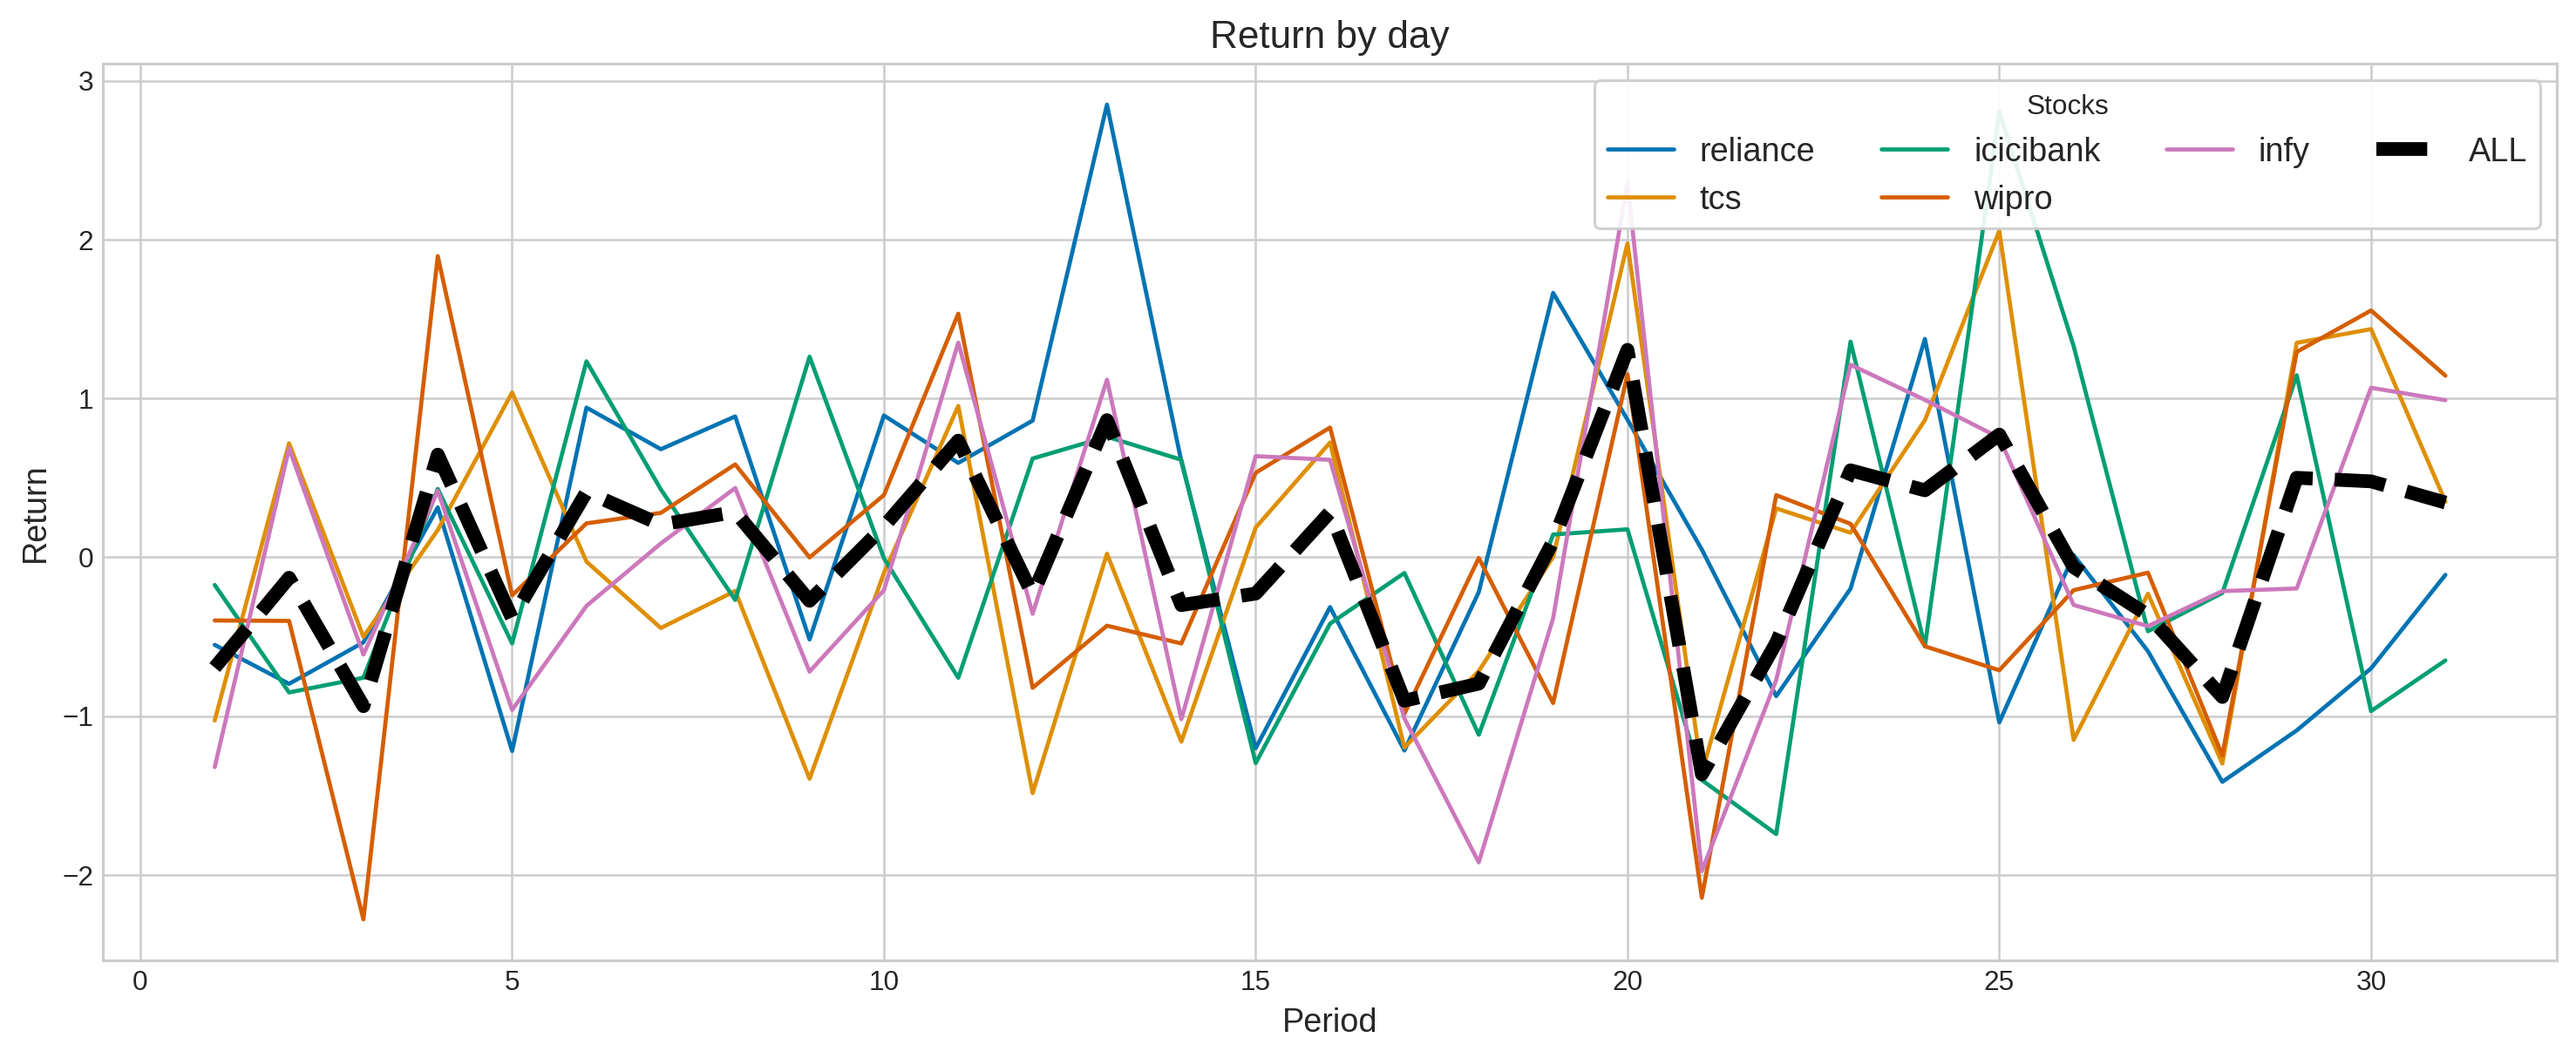

In [23]:
plotting_helper.compare_stocks(stocks, value='Return', by='day', scatter=False)

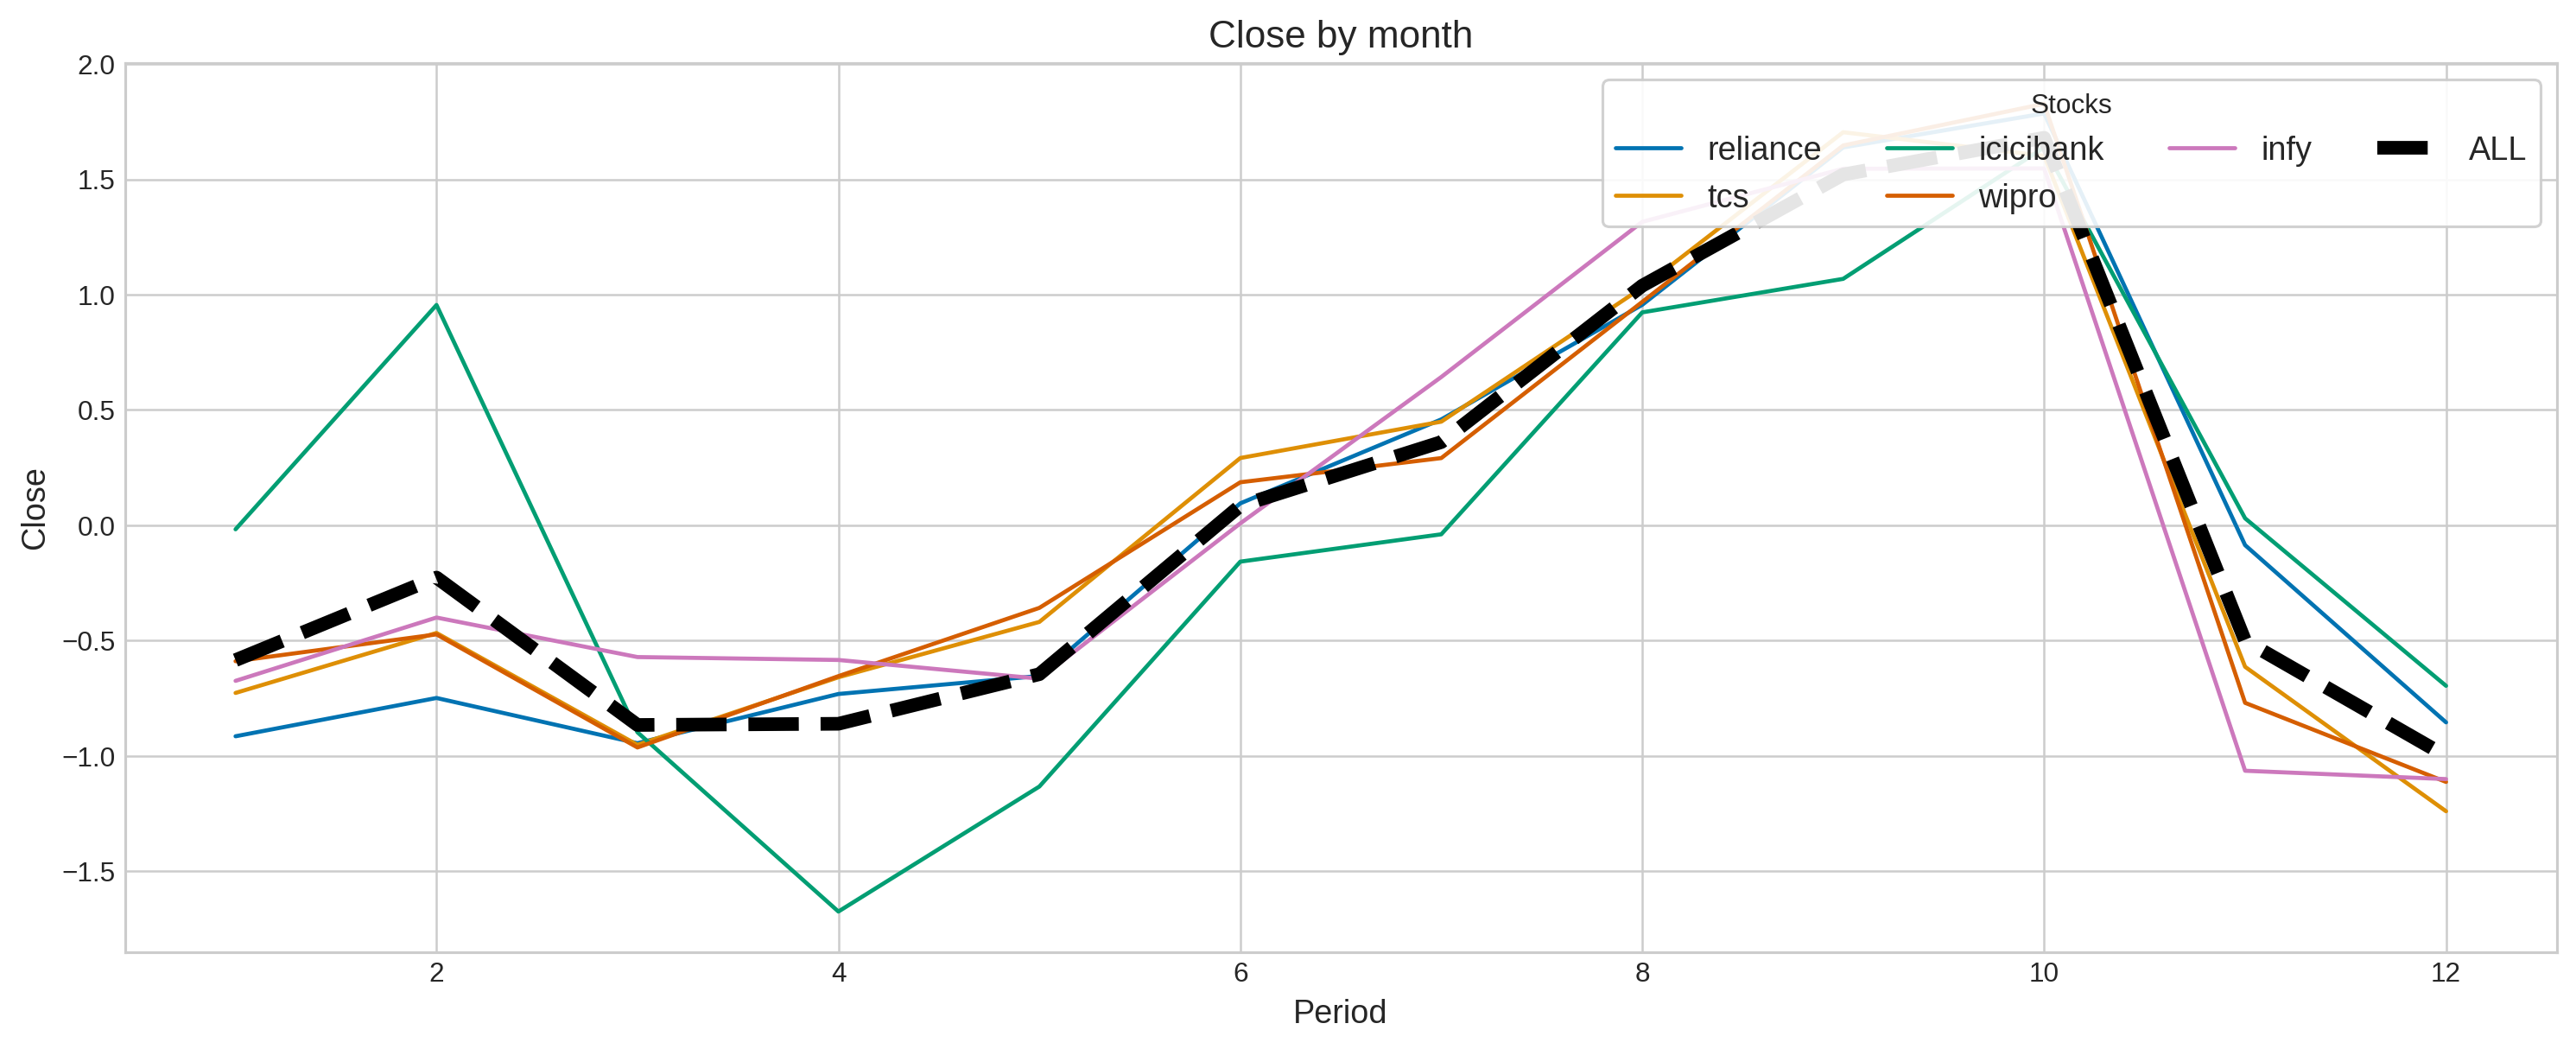

In [24]:
plotting_helper.compare_stocks(stocks, value='Close', by='month', scatter=False)

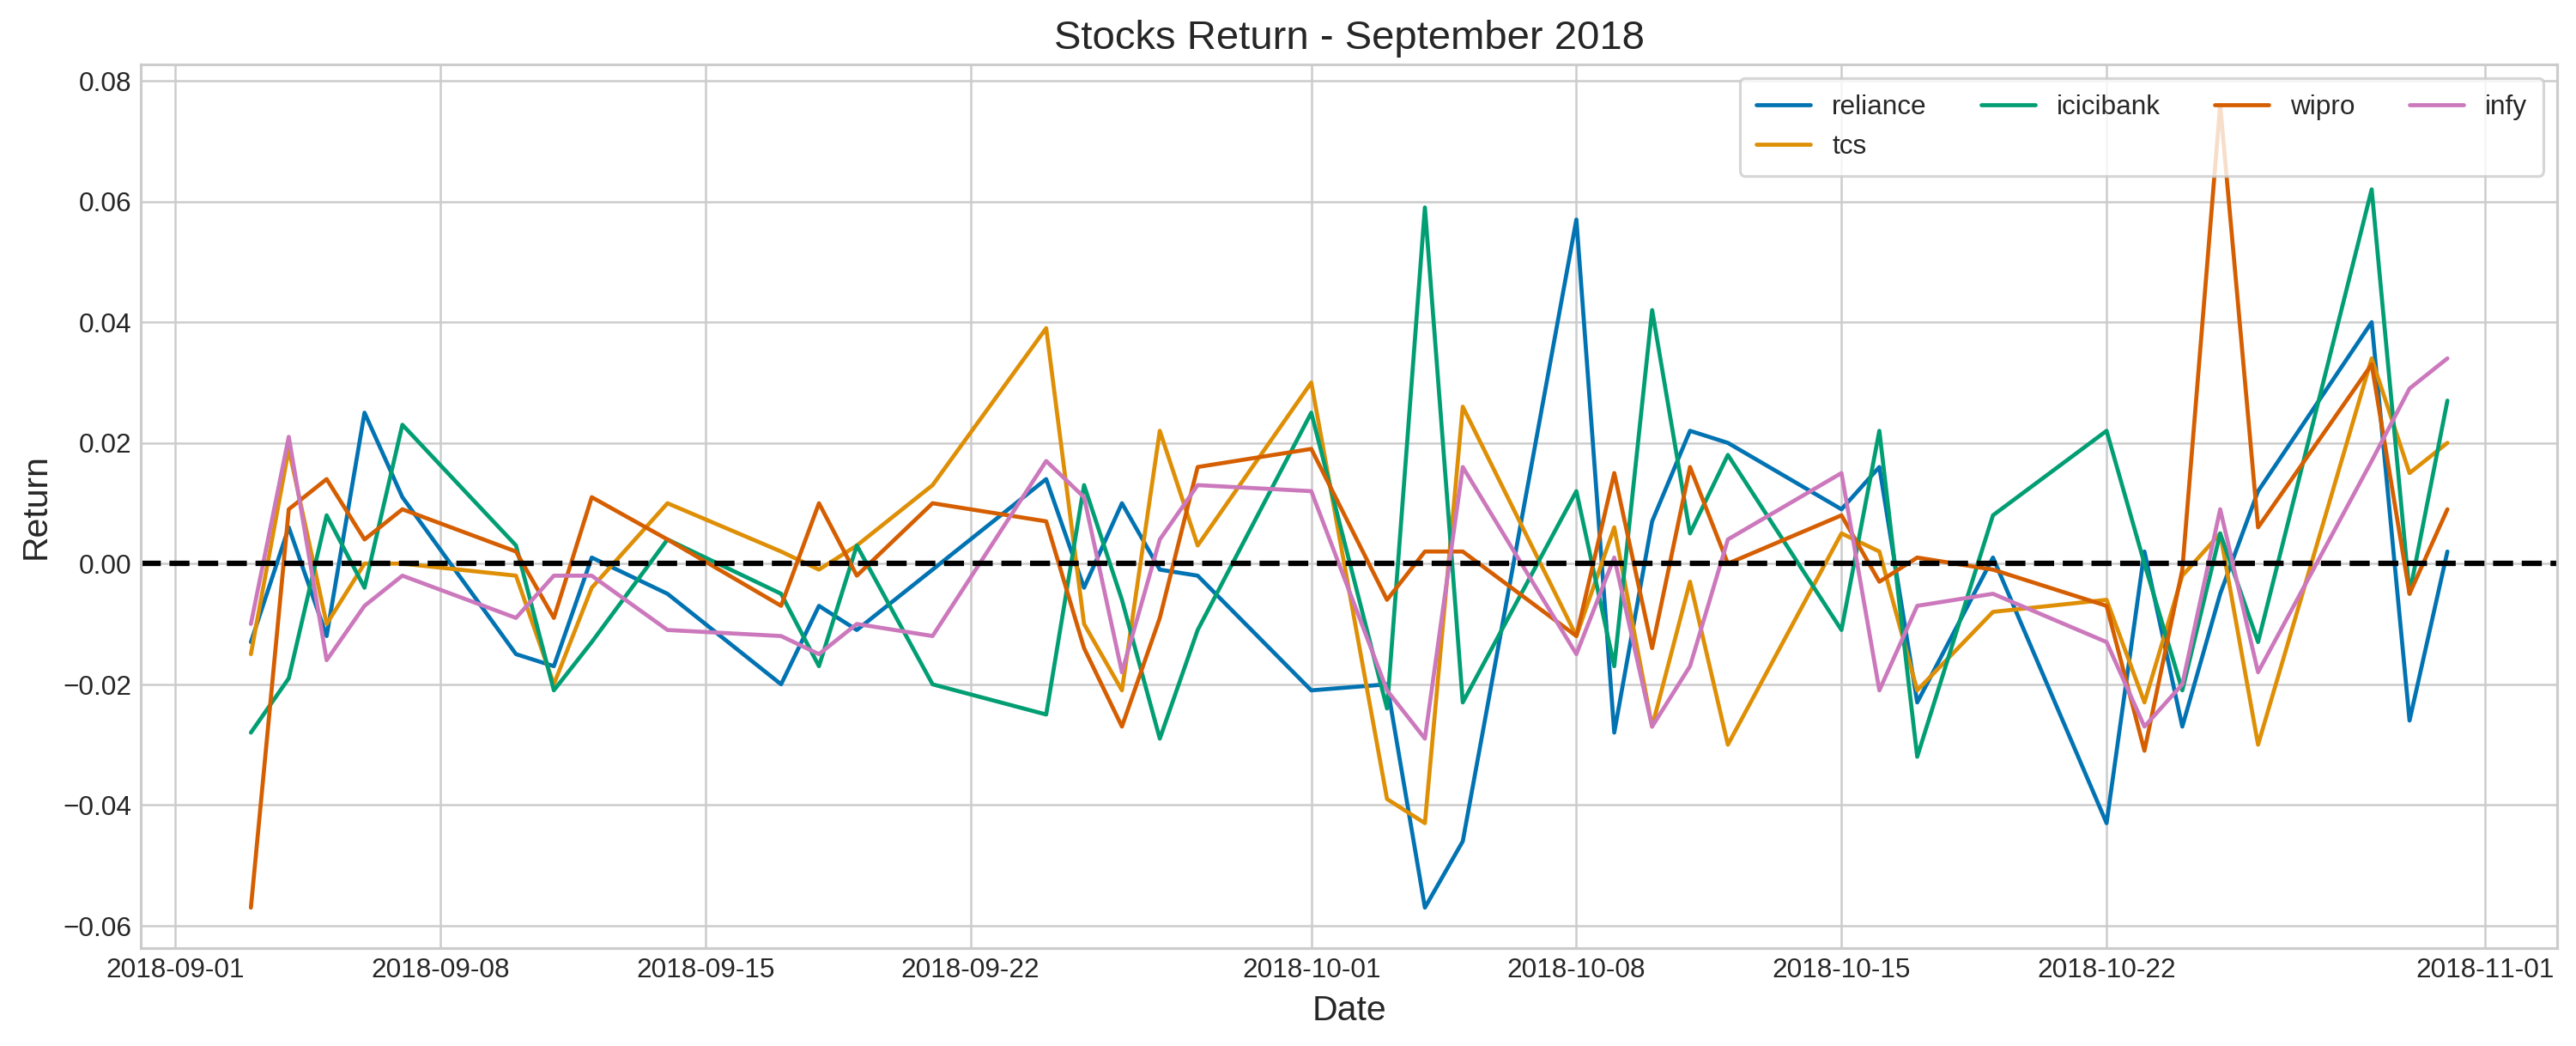

In [25]:
stocks_return_correlation = {}

plt.figure(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
for i in stocks:    
    stocks_return_correlation[i] = stocks[i].loc['2018-9':'2018-10'].Return
    plt.plot(stocks[i].loc['2018-9':'2018-10'].Return, label=i)
    plt.legend(frameon=True, loc=1, ncol=4, fontsize=10, borderpad=.6)
plt.title('Stocks Return - September 2018', fontSize=15)
plt.xlabel('Date', fontSize=13)
plt.ylabel('Return', fontSize=13)
plt.axhline(0, c='k', lw=2, ls='--')
plt.show()

